## $$Data \ analysis \ and \ prediction \ of \ Bank \ Churn \ Customer$$

The following data is obtained from a bank to decide on the churness of a Customer as it is more feasible to retain a customer than appoint a new one. So companies, attract existing customers with different deals to keep them in close proximity. We will be analysing what are the actual factors that matter to these existing customers for their stayback 

The dataset contains a combination of numerical and catgeorical columns:

**Numerical**

*Customerid*

*Creditscore*

*Age*

*Tenure*

*Balance*

**Categorical**

*SurName*

*Geography*

*Gender*

**Why Classification?**

**Because the objective here is to judge if a customer is going to be loyal to the bank or not, which are two different classes**

From the domain knowledge we bear, we can understand that churn depends on the Income,Number of Products held/purchased through bank,Tenure with bank,Activity with the bank etc

We will be using Supervised Machine Learning approach along with Classification techniques to get a clear knowledge about Churness of a Customer. But, firstly let's explore and understand the data we have

### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score,KFold, StratifiedKFold,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

### IMPORTING DATA

In [2]:
df=pd.read_csv("C:\\Users\\mearv\\OneDrive\\Desktop\\DS3_C6_S2_Classification_BankChurn_Data_Project.csv")

In [3]:
df.head()                     #First 5 rows of the data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()                     #Last 5 rows of the data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### STRUCTURE OF DATA

In [5]:
df.shape                      #Data has 10000 rows and 13 columns

(10000, 13)

### SUMMARY OF DATA

In [6]:
df.describe()                 #Summary of all numeric columns

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.describe(include='object')         #Summary of all categorical/object type columns

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,11,2
top,Smith,France,Male
freq,32,5001,5457


In [8]:
df.info()                           #Information about the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


### DATA VISUALISATION

In [9]:
df.head(3)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [10]:
df.Geography.value_counts()

France     5001
Germany    2502
Spain      2469
france        7
espanio       6
fra           6
ger           4
spain         2
germany       1
gernamy       1
GERMANY       1
Name: Geography, dtype: int64

In [11]:
df.Geography.replace({'ger':'Germany','germany':'Germany','gernamy':'Germany','GERMANY':'Germany'
                     ,'espanio':'Spain','fra':'France','spain':'Spain','france':'France'},inplace=True)

In [12]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

*We can observe that Germany and few countries have been mispelt, we correct it by replacing a Unique name*

In [13]:
df.Exited.value_counts()          #Two Classes in our Target variable 0 and 1

0    7963
1    2037
Name: Exited, dtype: int64

## DATA VISUALISATION

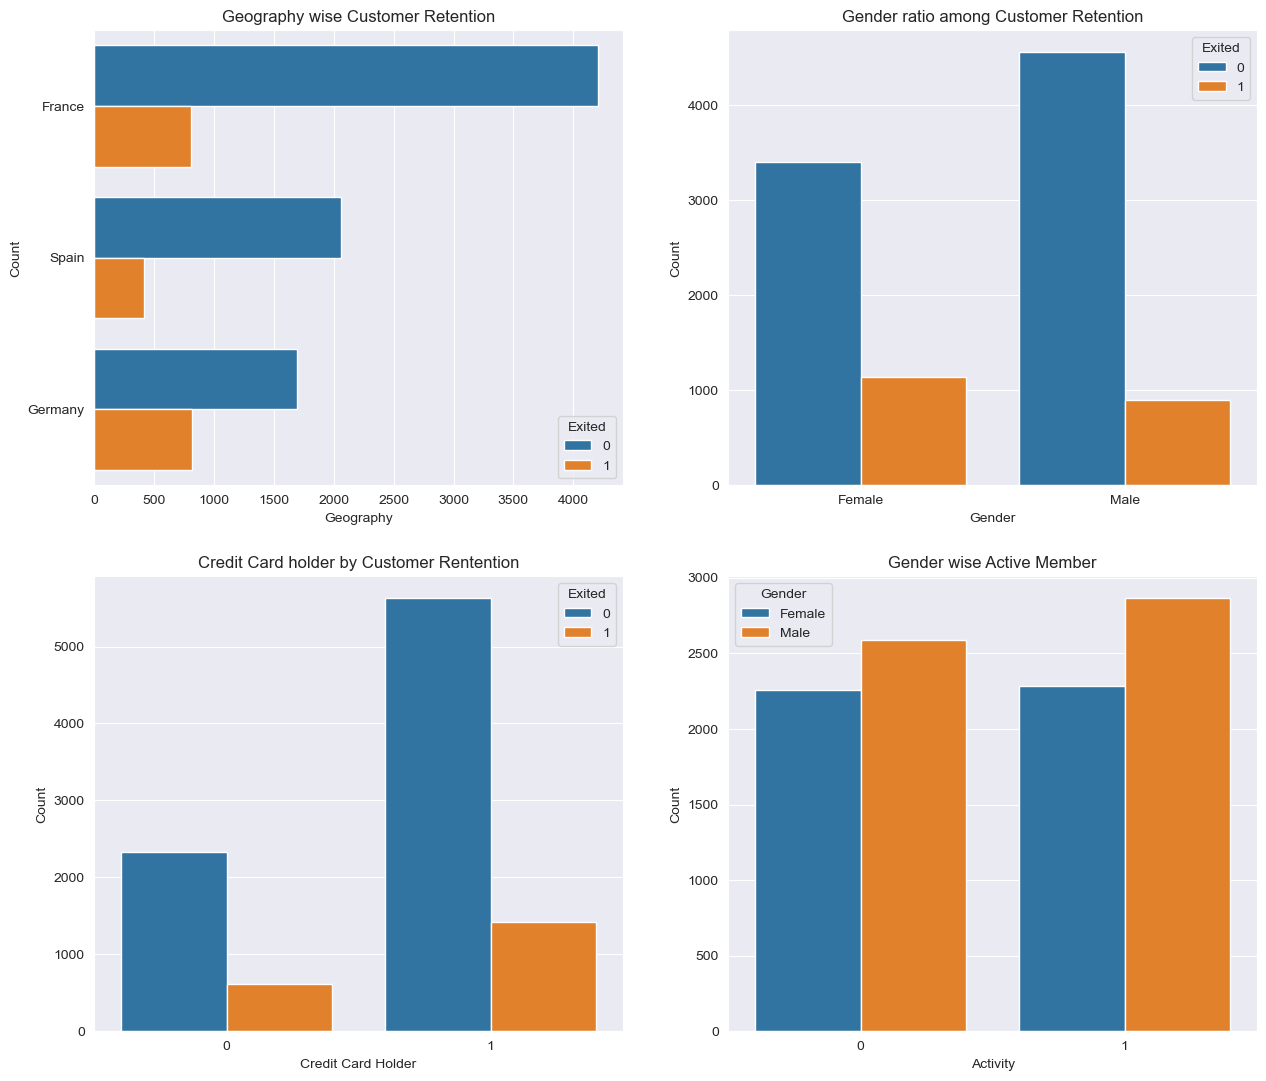

In [14]:
plt.figure(figsize=(15,13))
sns.set_style('darkgrid')

plt.subplot(221)
sns.countplot(y=df.Geography,hue=df.Exited)
plt.title('Geography wise Customer Retention')
plt.xlabel('Geography')
plt.ylabel('Count')


plt.subplot(222)
sns.countplot(df.Gender,hue=df.Exited)
plt.title('Gender ratio among Customer Retention')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(223)
sns.countplot(df.HasCrCard,hue=df.Exited)
plt.title('Credit Card holder by Customer Rentention')
plt.xlabel('Credit Card Holder')
plt.ylabel('Count')


plt.subplot(224)
sns.countplot(df.IsActiveMember,hue=df.Gender)
plt.title('Gender wise Active Member')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.show()

**PLOT 1 - France has retained a lot of Customers followed by Spain even though Germany is much bigger in population**

**PLOT 2 - Shows us that Males have been more loyal than females to the bank**

**PLOT 3 - Many of the customers who have sticked with the bank are Credit card holders, hence that plan works for retention of            a customer**

**PLOT 4 - Males have been more active**

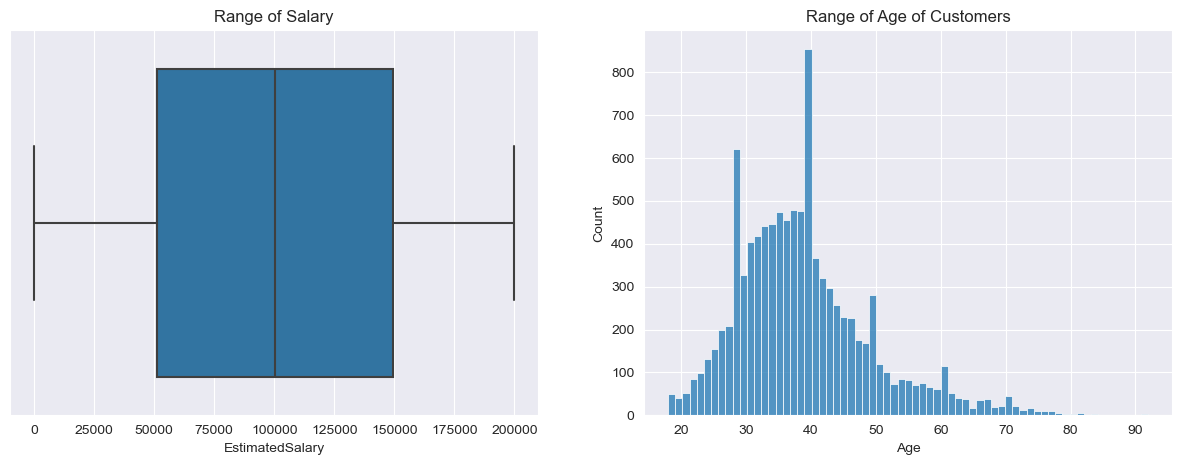

In [15]:
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')

plt.subplot(121)
sns.boxplot(df.EstimatedSalary)
plt.title("Range of Salary")

plt.subplot(122)
sns.histplot(df.Age)
plt.title("Range of Age of Customers")
plt.show()

#### Customer's salary are ranged between 50000 - 1,50,000 Annually

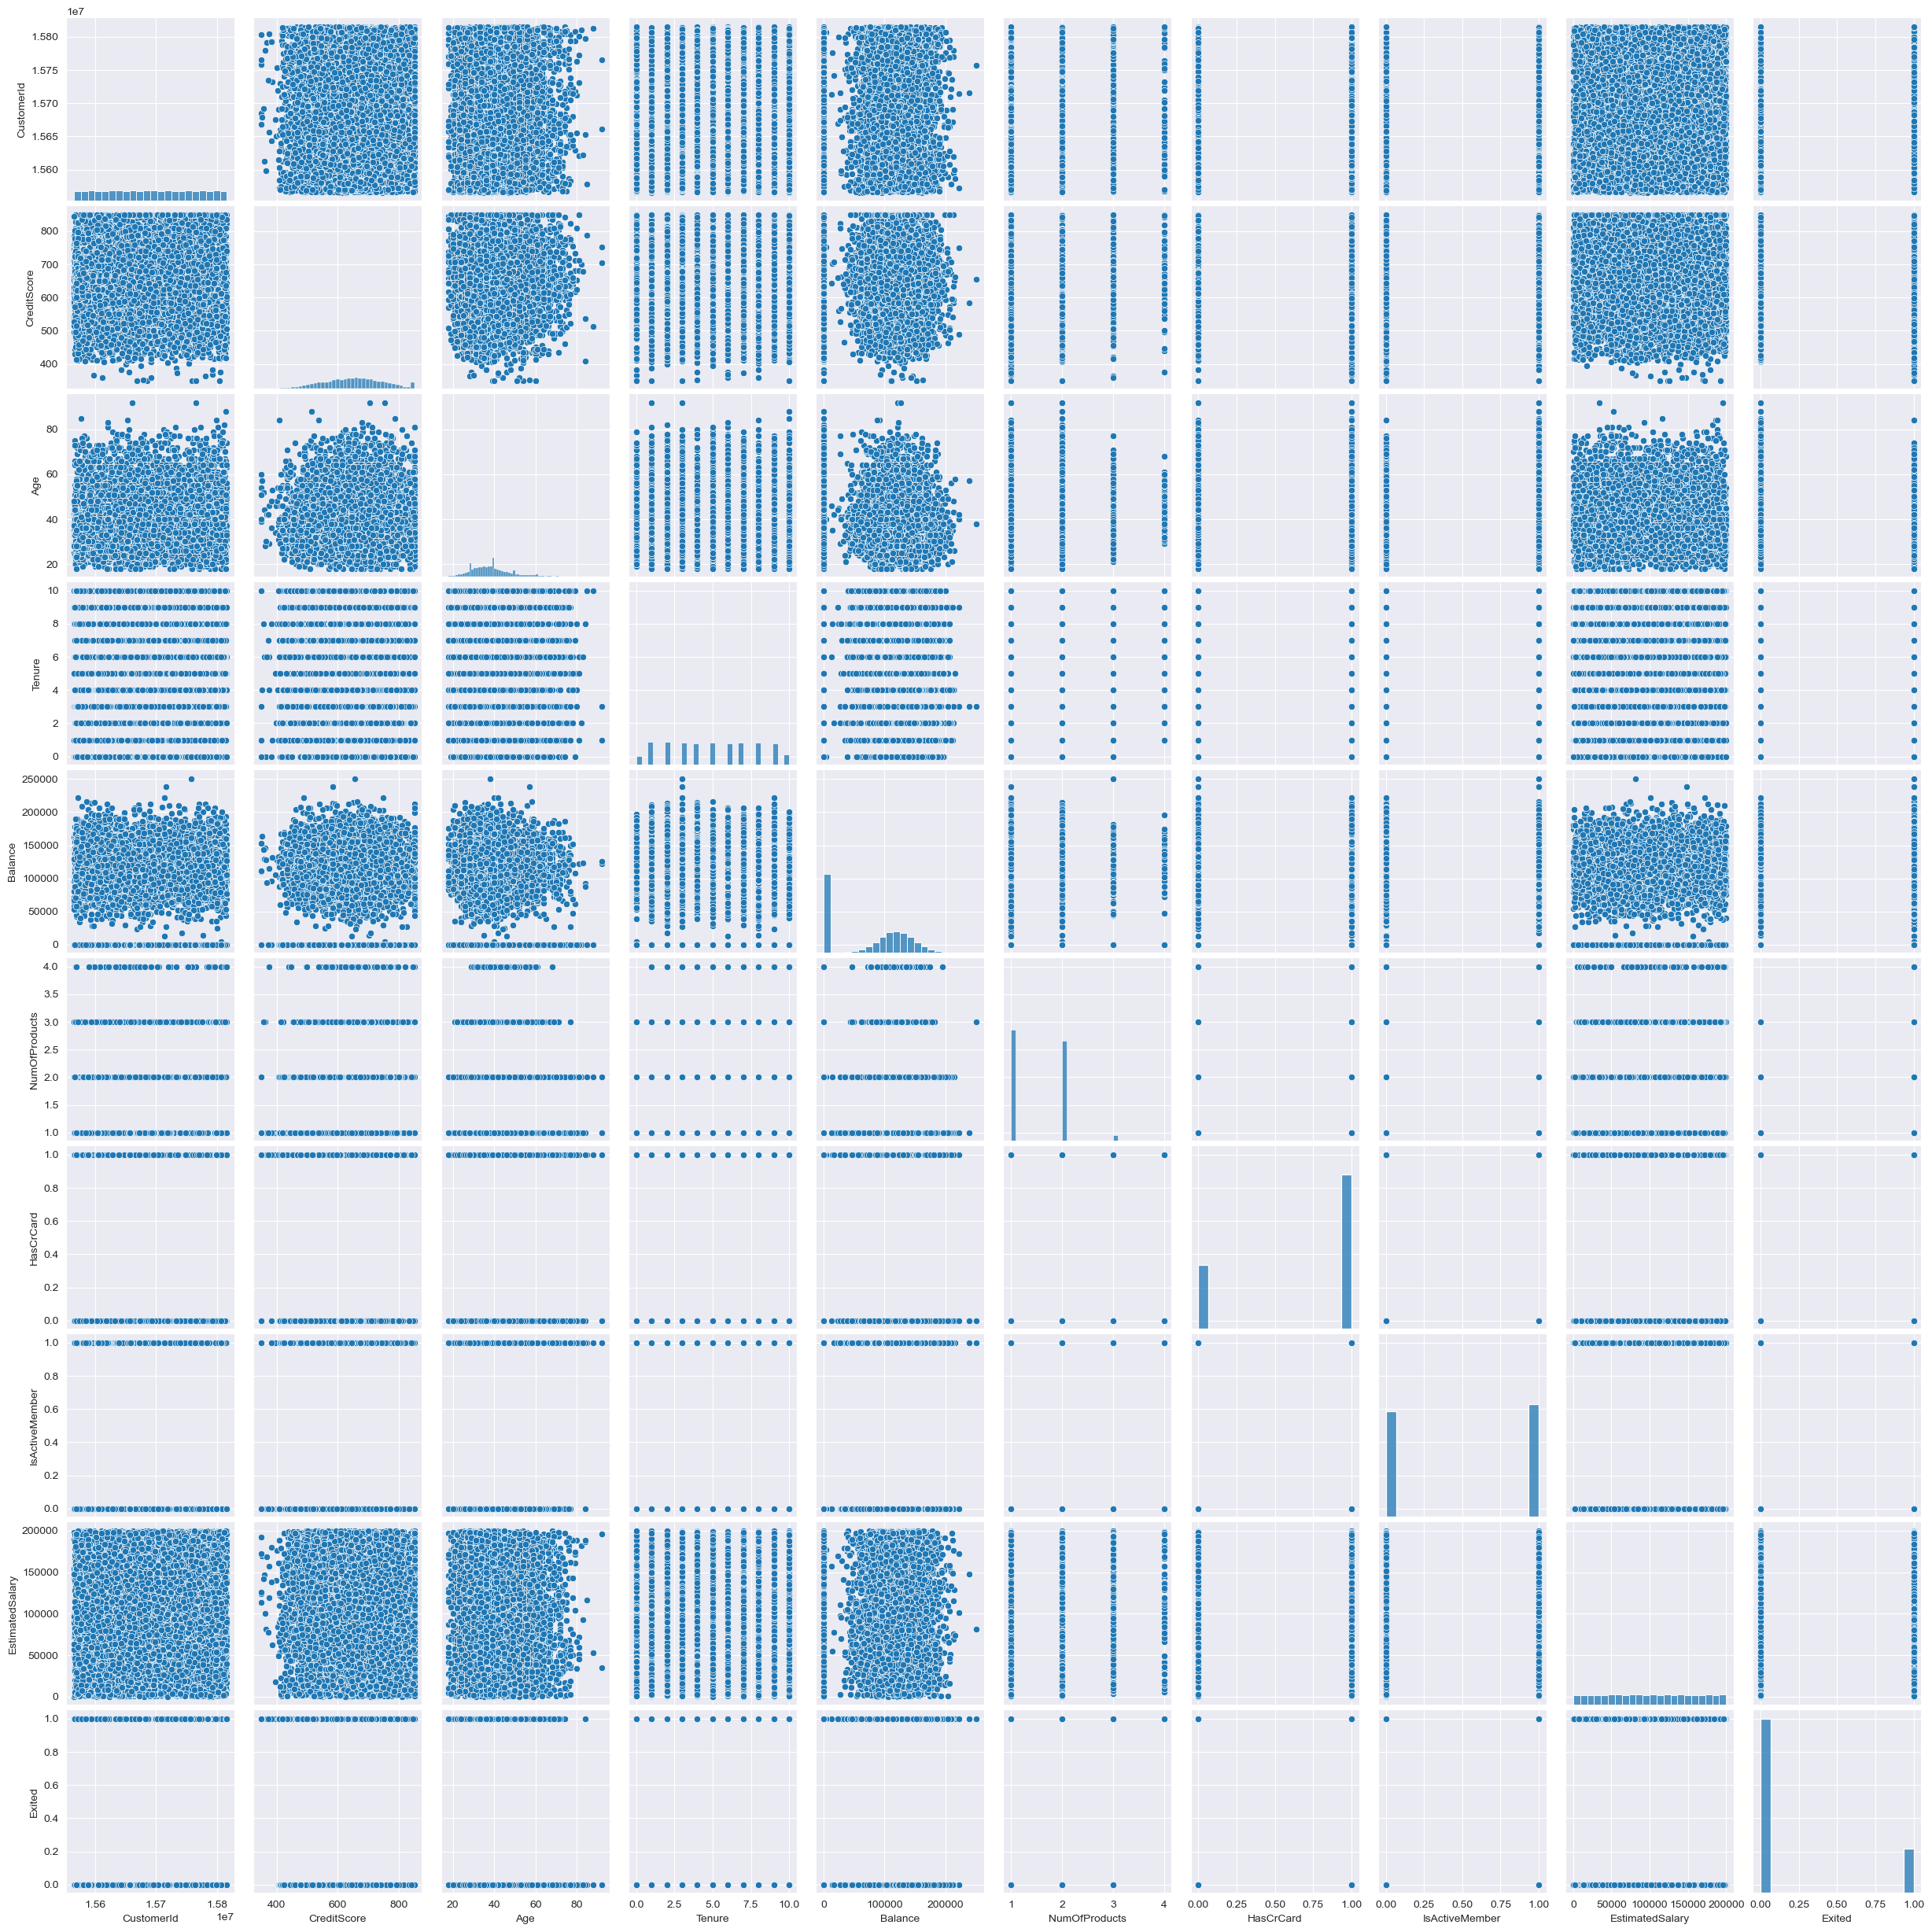

In [16]:
sns.pairplot(df)

### ***The above pairplot gives relationship between all the columns***

## DATA PREPROCESSING

### 1.CHECK FOR SPECIAL CHARACTERS IN THE DATA

In [17]:
for cols in df.columns:
    print(cols,'\n',df[cols].value_counts())
    print('---------------------------------------------------------------')

CustomerId 
 15634602    1
15667932    1
15766185    1
15667632    1
15599024    1
           ..
15599078    1
15702300    1
15660735    1
15671390    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64
---------------------------------------------------------------
Surname 
 Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
---------------------------------------------------------------
CreditScore 
 850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64
---------------------------------------------------------------
Geography 
 France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
---------------------------------------------------------------
Gender 
 Male      5457
Female    4543
Name:

**There are special characters present in the data**

### 2.LABEL ENCODING

#### FEATURE ENGINEERING

***Now moving ahead to converting the categorical data to numerics so the machine can understand and consider it***

In [18]:
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### CONVERTION OF OBJECT DATA TYPE TO CATEGORICAL

In [19]:
for cols in df.select_dtypes(include='object'):                  #Accessing all object type columns using for loop
    df[cols]=df[cols].astype('category')

In [20]:
df.dtypes

CustomerId            int64
Surname            category
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
dtype: object

**By using for loop,we have accessed all the object type columns and converted into categorical datatype**

### CONVERTION OF CATEGORICAL TO NUMERIC 

In [21]:
le=LabelEncoder()                   #Label Encoder fit transforms categorical values and assigns them into numerical values 

In [22]:
for cols in df.select_dtypes(include='category'):
    df[cols+'_encode']=le.fit_transform(df[cols])

In [23]:
df.dtypes

CustomerId             int64
Surname             category
CreditScore            int64
Geography           category
Gender              category
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Surname_encode         int32
Geography_encode       int32
Gender_encode          int32
dtype: object

In [24]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_encode,Geography_encode,Gender_encode
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1115,0,0
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1177,2,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,2040,0,0
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,289,0,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1822,2,0


#### ***New columns with numeric values of the respective categorical values have been appended***

### 3.DATA SCALING

In [25]:
df.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_encode,Geography_encode,Gender_encode
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1115,0,0
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1177,2,0


**Since the values in data is distant to each other in different columns, we make the data unit free by Standardisation using StandardScaler(in built function)**

#### *The class label i.e Exited should'nt be scaled, hence we drop it before Standardisation of data*

In [26]:
df1=df.drop(columns='Exited')

In [27]:
df1.head(1)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Surname_encode,Geography_encode,Gender_encode
0,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1115,0,0


In [28]:
def feature_scale(scale):
    numerics=['int16','int32','int64','float16','float32','float64']
    new_df=df1.select_dtypes(include=numerics)                #df1 which has doesn't contain the target varibale has been passed
    if scale=='minmax':
        scaler=MinMaxScaler()
    else:
        scaler=StandardScaler()
    df_scaled=pd.DataFrame(scaler.fit_transform(new_df.to_numpy()),columns=new_df.columns)
    return df_scaled

### STANDARDISATION

In [29]:
scale='blah'
scaled_df=feature_scale(scale)
scaled_df

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Surname_encode,Geography_encode,Gender_encode
0,-0.783213,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-0.464182,-0.901886,-1.095988
1,-0.606534,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.390910,1.515067,-1.095988
2,-0.995885,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,0.628988,-0.901886,-1.095988
3,0.144767,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-1.440354,-0.901886,-1.095988
4,0.652659,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,0.371355,1.515067,-1.095988
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.177652,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,0.580534,-0.901886,0.912419
9996,-1.682806,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,-0.203003,-0.901886,0.912419
9997,-1.479282,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,0.073539,-0.901886,-1.095988
9998,-0.119356,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,0.989439,0.306591,0.912419


In [30]:
scaled_df['Exited']=df['Exited']        #Appending the Target varibale back to scaled dataframe

In [31]:
scaled_df.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Surname_encode,Geography_encode,Gender_encode,Exited
0,-0.783213,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,-0.464182,-0.901886,-1.095988,1
1,-0.606534,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.390910,1.515067,-1.095988,0
2,-0.995885,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,0.628988,-0.901886,-1.095988,1
3,0.144767,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-1.440354,-0.901886,-1.095988,0
4,0.652659,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,0.371355,1.515067,-1.095988,0


### 4.CORRELATION

In [32]:
df.head(1)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_encode,Geography_encode,Gender_encode
0,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1,1115,0,0


<AxesSubplot:>

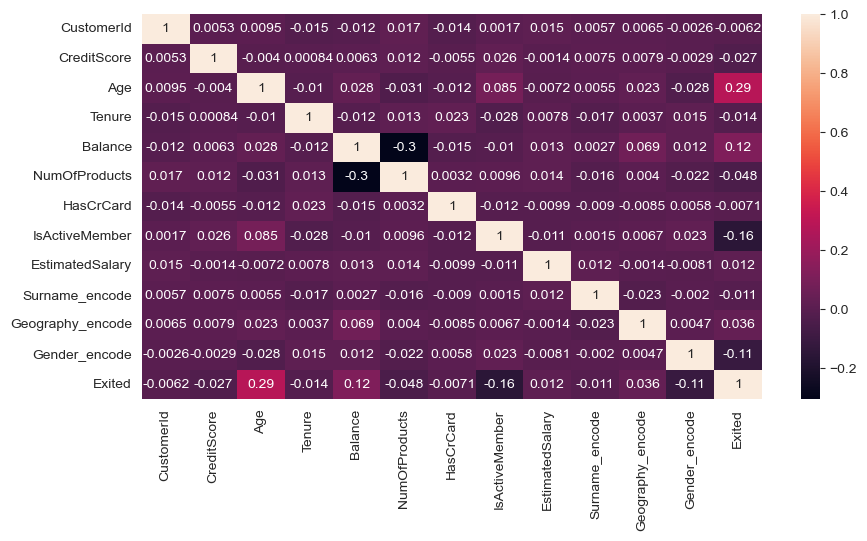

In [33]:
plt.figure(figsize=(10,5))
sns.heatmap(scaled_df.corr(),annot=True)

* Our Target varibale is already defined to us, 'Exited'

* Based on the correlation between Target and other fetaures, we carefully order the features by descending order :

    *  Age - 0.29
    
    * IsActive number - 0.16
    
    * Balance - 0.12
    
    * Gender_encode - 0.11

#### *Let's split the data now, the feature we are interested in predicting is Exited, so that'll be our y*

#### DEFINING X AND Y

In [34]:
scaled_df.columns

Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Surname_encode', 'Geography_encode', 'Gender_encode', 'Exited'],
      dtype='object')

In [35]:
y=scaled_df['Exited']                                                      #Target
x=scaled_df[['Age','IsActiveMember','Balance','Gender_encode']]            #Features

In [36]:
x.head()

,Age,IsActiveMember,Balance,Gender_encode
0,0.293517,0.970243,-1.225848,-1.095988
1,0.198164,0.970243,0.117350,-1.095988
2,0.293517,-1.030670,1.333053,-1.095988
3,0.007457,-1.030670,-1.225848,-1.095988
4,0.388871,0.970243,0.785728,-1.095988


### 5.DATA SPLITTING

#### TRAIN-TEST SPLIT METHOD

***Here we go with the in built function to split the data into 70% for Training and 30% for Testing the Model***

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=20)     #In-built method

In [38]:
x.shape               #Total Rows

(10000, 4)

In [39]:
x_train.shape         #Rows split for Training

(7000, 4)

In [40]:
x_test.shape          #Rows split for Testing

(3000, 4)

In [41]:
y_train.shape

(7000,)

In [42]:
y_test.shape

(3000,)

## DATA MODELLING

### 1.LOGISTIC REGRESSION(BASELINE MODEL)

### MODEL TRAINING

In [43]:
base_model=LogisticRegression()

In [44]:
base_model.fit(x_train,y_train)

LogisticRegression()

#### PREDICTED  VALUES

In [45]:
y_predict_base_model=base_model.predict(x_test)           #Machine Predicted Values 

In [46]:
pred_vals1=pd.DataFrame()
pred_vals1['Actual']=y_test
pred_vals1['Predicted']=y_predict_base_model
pred_vals1.sample(5)

,Actual,Predicted
7607,0,0
1556,0,0
9322,0,0
7818,0,0
3693,1,0


#### MODEL EVALUATORS

#### 1.CONFUSION MATRIX

In [47]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix: \n",confusion_matrix(y_test,y_predict_base_model))
tn, fp, fn, tp = confusion_matrix(y_test,y_predict_base_model).ravel()

print("True positive : %d \n False negative : %d \n False positive : %d \n True negative : %d \n"%(tn,fp,fn,tp))


Confusion matrix: 
 [[2333   90]
 [ 487   90]]
True positive : 2333 
 False negative : 90 
 False positive : 487 
 True negative : 90 



In [48]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predict_base_model)

In [49]:
cm_base_model=metrics.confusion_matrix(y_test,y_predict_base_model,labels=[0,1])

#### CONFUSION MATRIX VISUAL

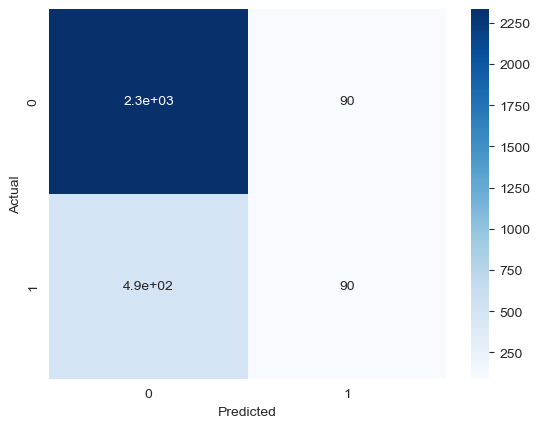

In [50]:
sns.heatmap(cm_base_model,cmap='Blues',annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 2.ACCURACY,F1_SCORE,RECALL,PRECISION

In [51]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print('accuracy:', round(accuracy_score(y_test,y_predict_base_model),3))
print('f1_score:', f1_score(y_test,y_predict_base_model) )
print('recall:', recall_score(y_test,y_predict_base_model) )
print('precission:', precision_score(y_test,y_predict_base_model))

accuracy: 0.808
f1_score: 0.23778071334214002
recall: 0.1559792027729636
precission: 0.5


In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_base_model))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2423
           1       0.50      0.16      0.24       577

    accuracy                           0.81      3000
   macro avg       0.66      0.56      0.56      3000
weighted avg       0.76      0.81      0.76      3000



#### 3.ROC CURVE

In [53]:
from sklearn.metrics import roc_auc_score
roc_base_model=roc_auc_score(y_test,base_model.predict_proba(x_test)[:,1])
roc_base_model

0.7353260313675056

In [54]:
x_test

,Age,IsActiveMember,Balance,Gender_encode
9957,-1.327494,-1.030670,-1.225848,0.912419
1687,-0.183251,0.970243,0.973148,0.912419
2116,0.484225,-1.030670,-1.225848,0.912419
231,0.102810,-1.030670,-1.225848,0.912419
2780,0.102810,0.970243,0.445642,0.912419
...,...,...,...,...
2210,-0.469311,0.970243,0.811563,-1.095988
2141,-1.994969,0.970243,-1.225848,0.912419
1036,-0.850726,-1.030670,0.494119,0.912419
8987,-0.278604,0.970243,0.030375,0.912419


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.735


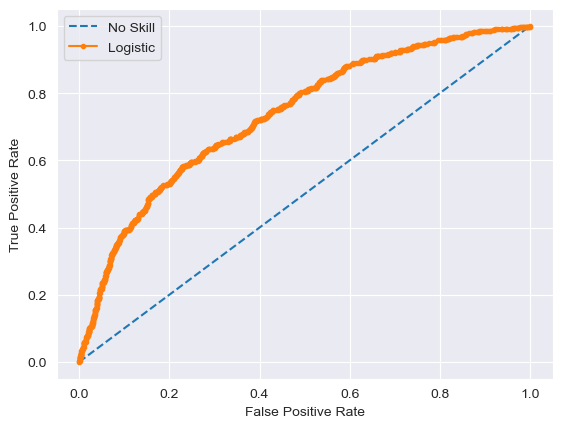

In [55]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = base_model.predict_log_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:,1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

*AUC id lesser than 0.6, which isn't ideal for a good model but ROC value is fair enough*

### 2.DECISION TREE(DEFAULT CART)

In [56]:
decision_tree_default = DecisionTreeClassifier(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)

decision_tree_default.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10, min_samples_split=5)

#### PREDICTED VALUES

In [57]:
y_predict_decision_tree_default=decision_tree_default.predict(x_test)

#### MODEL EVALUATORS

#### 1.CONFUSION MATRIX

In [58]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix: \n",confusion_matrix(y_test,y_predict_decision_tree_default))
tn, fp, fn, tp = confusion_matrix(y_test,y_predict_decision_tree_default).ravel()

print("True positive : %d \n False negative : %d \n False positive : %d \n True negative : %d \n"%(tn,fp,fn,tp))


Confusion matrix: 
 [[2322  101]
 [ 400  177]]
True positive : 2322 
 False negative : 101 
 False positive : 400 
 True negative : 177 



In [59]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predict_decision_tree_default)

In [60]:
cm_cart=metrics.confusion_matrix(y_test,y_predict_decision_tree_default,labels=[0,1])

#### CONFUSION MATRIX VISUAL

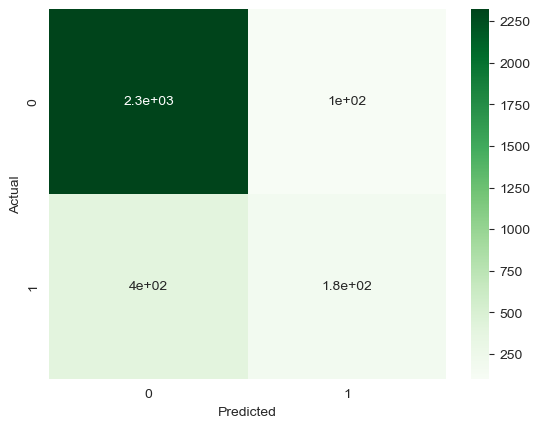

In [61]:
sns.heatmap(cm_cart,cmap='Greens',annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 2.ACCURACY,F1_SCORE,RECALL,PRECISION

In [62]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print('accuracy:', round(accuracy_score(y_test,y_predict_decision_tree_default),3))
print('f1_score:', f1_score(y_test,y_predict_decision_tree_default) )
print('recall:', recall_score(y_test,y_predict_decision_tree_default) )
print('precission:', precision_score(y_test,y_predict_decision_tree_default))

accuracy: 0.833
f1_score: 0.41403508771929826
recall: 0.30675909878682844
precission: 0.6366906474820144


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_decision_tree_default))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2423
           1       0.64      0.31      0.41       577

    accuracy                           0.83      3000
   macro avg       0.74      0.63      0.66      3000
weighted avg       0.81      0.83      0.81      3000



#### 3.ROC CURVE

In [64]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test,decision_tree_default.predict_proba(x_test)[:,1])
roc

0.7445819990544114

In [65]:
lr_probs = decision_tree_default.predict_proba(x_test)
lr_probs

array([[0.93599615, 0.06400385],
       [0.86971047, 0.13028953],
       [0.71668823, 0.28331177],
       ...,
       [0.86971047, 0.13028953],
       [0.93599615, 0.06400385],
       [0.71668823, 0.28331177]])

### DECISION TREE VISUAL(DEFAULT)

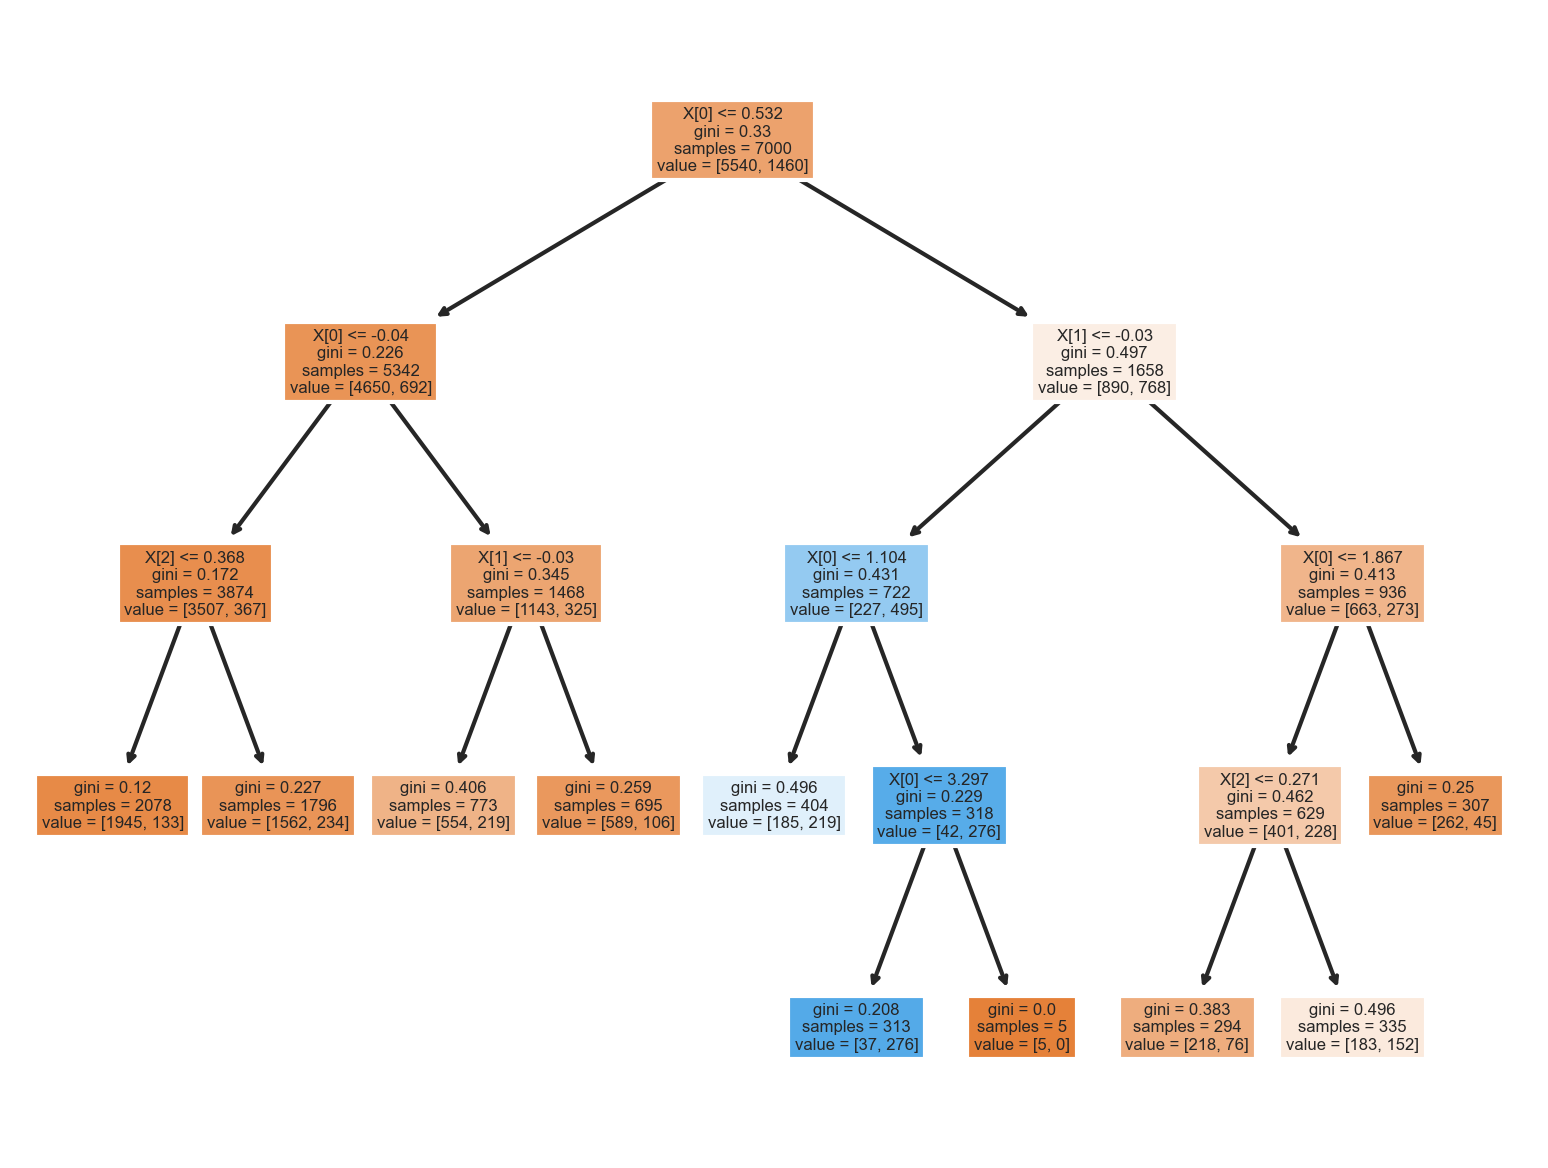

In [66]:
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(dpi=300)

tree.plot_tree(decision_tree_default,
           filled = True);

#save figure in current directory as png
fig.savefig('Bank Churn.png')

#### HYPER TUNING THE MAX DEPTH TO GET BEST ACCURACY

Finding the best accuracy by tuning max depth

In [67]:
max_depth_range = list(range(1, 6))                                 
accuracy = []                              # List to store the accuracy for each value of max_depth:
acc_df=pd.DataFrame()
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(x_train, y_train)    
    score = clf.score(x_test, y_test)
    accuracy.append(score)
    acc_df['Depth']=max_depth_range



In [68]:
acc_df['Accuracy']=pd.DataFrame(accuracy)

In [69]:
acc_df

,Depth,Accuracy
0,1,0.807667
1,2,0.833000
2,3,0.833000
3,4,0.835333
4,5,0.830667


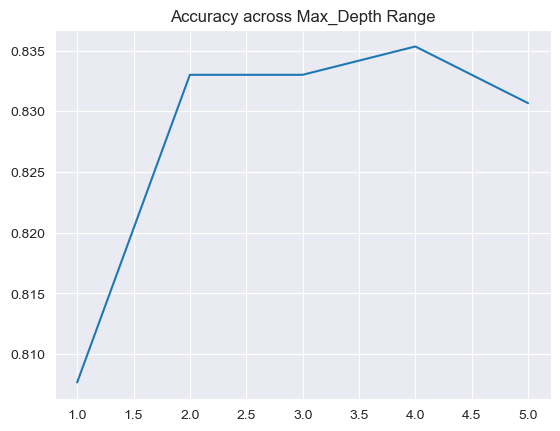

In [70]:
plt.title('Accuracy across Max_Depth Range')
plt.plot(range(1,6),accuracy)
plt.show()

***We can confirm both visually and numerically that after max depth = 4, the accuracy of the model decreases drastically***

### As the default Decision Tree has the same parameters as the highest accuracy model works with, there is no need to Hypertune the Decision Tree

### 3. NAIVE BAYES

In [71]:
naive_bayes_model=GaussianNB()

In [72]:
naive_bayes_model.fit(x_train,y_train)

GaussianNB()

In [73]:
y_predict_naive_bayes_model=naive_bayes_model.predict(x_test)

#### MODEL EVALUATORS

#### 1.CONFUSION MATRIX

In [74]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix: \n",confusion_matrix(y_test,y_predict_naive_bayes_model))
tn, fp, fn, tp = confusion_matrix(y_test,y_predict_naive_bayes_model).ravel()

print("True positive : %d \n False negative : %d \n False positive : %d \n True negative : %d \n"%(tn,fp,fn,tp))


Confusion matrix: 
 [[2339   84]
 [ 499   78]]
True positive : 2339 
 False negative : 84 
 False positive : 499 
 True negative : 78 



In [75]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predict_naive_bayes_model)

In [76]:
cm_NB=metrics.confusion_matrix(y_test,y_predict_naive_bayes_model,labels=[0,1])

#### CONFUSION MATRIX VISUAL

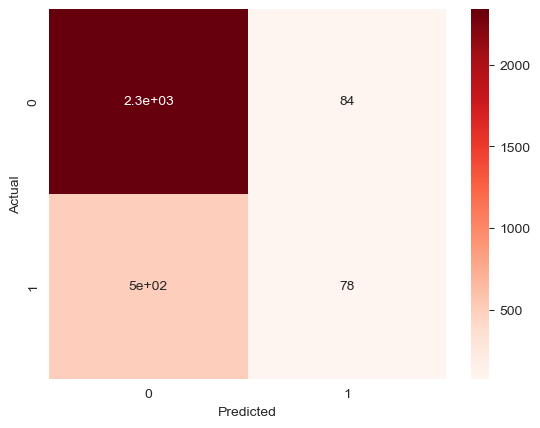

In [77]:
sns.heatmap(cm_NB,cmap='Reds',annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 2.ACCURACY,F1_SCORE,RECALL,PRECISION

In [78]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print('accuracy:', round(accuracy_score(y_test,y_predict_naive_bayes_model),3))
print('f1_score:', f1_score(y_test,y_predict_naive_bayes_model) )
print('recall:', recall_score(y_test,y_predict_naive_bayes_model) )
print('precission:', precision_score(y_test,y_predict_naive_bayes_model))

accuracy: 0.806
f1_score: 0.21109607577807848
recall: 0.13518197573656845
precission: 0.48148148148148145


In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_naive_bayes_model))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2423
           1       0.48      0.14      0.21       577

    accuracy                           0.81      3000
   macro avg       0.65      0.55      0.55      3000
weighted avg       0.76      0.81      0.76      3000



#### 3.ROC CURVE

In [80]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test,naive_bayes_model.predict_proba(x_test)[:,1])
roc

0.7423614394404862

### 4.RANDOM FOREST CLASSFIER(DEFAULT)

In [81]:
random_forest_classifier = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)


In [82]:
 %%time
random_forest_classifier.fit(x_train, y_train)

Wall time: 215 ms


RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [83]:
y_predict_Random_forest_default=random_forest_classifier.predict(x_test)

#### MODEL EVALUATORS

#### 1.CONFUSION MATRIX

In [84]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix: \n",confusion_matrix(y_test,y_predict_Random_forest_default))
tn, fp, fn, tp = confusion_matrix(y_test,y_predict_Random_forest_default).ravel()

print("True positive : %d \n False negative : %d \n False positive : %d \n True negative : %d \n"%(tn,fp,fn,tp))


Confusion matrix: 
 [[2353   70]
 [ 413  164]]
True positive : 2353 
 False negative : 70 
 False positive : 413 
 True negative : 164 



In [85]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predict_Random_forest_default)

In [86]:
cm_rf=metrics.confusion_matrix(y_test,y_predict_Random_forest_default,labels=[0,1])

#### CONFUSION MATRIX VISUAL

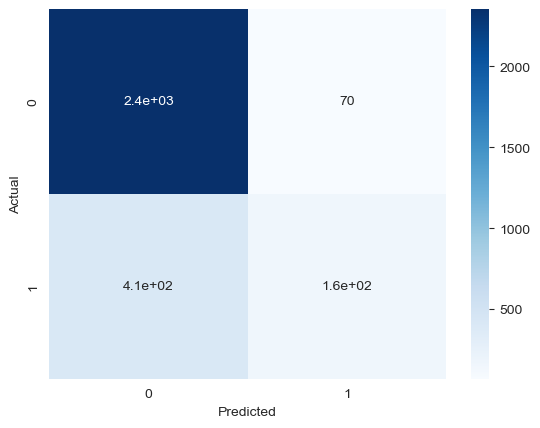

In [87]:
sns.heatmap(cm_rf,cmap='Blues',annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 2.ACCURACY,F1_SCORE,RECALL,PRECISION

In [88]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
print('accuracy:', round(accuracy_score(y_test,y_predict_Random_forest_default),3))
print('f1_score:', f1_score(y_test,y_predict_Random_forest_default) )
print('recall:', recall_score(y_test,y_predict_Random_forest_default) )
print('precission:', precision_score(y_test,y_predict_Random_forest_default))

accuracy: 0.839
f1_score: 0.40443896424167686
recall: 0.28422876949740034
precission: 0.7008547008547008


In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_Random_forest_default))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2423
           1       0.70      0.28      0.40       577

    accuracy                           0.84      3000
   macro avg       0.78      0.63      0.66      3000
weighted avg       0.82      0.84      0.81      3000



#### 3.ROC CURVE

In [90]:
from sklearn.metrics import roc_auc_score
roc_rf=roc_auc_score(y_test,random_forest_classifier.predict_proba(x_test)[:,1])
roc_rf

0.7755972336168907

#### HYPER TUNING RANDOM FOREST USING GRID SEARCH CV

In [91]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)


In [92]:
params = {
 'max_depth': range(2,15),
 'min_samples_leaf': [5,10,20,50,100,200],
 'n_estimators': [10,25,30,50,100,200]
}


In [93]:
grid_search = GridSearchCV(estimator=rf,
 param_grid=params,
 cv = 4,
 n_jobs=-1, verbose=1, scoring="accuracy")

In [94]:
%%time
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 468 candidates, totalling 1872 fits
Wall time: 1min 26s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(2, 15),
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [95]:
grid_search.best_score_                #Best score of the model after Hype tuning

0.8308571428571427

### ***We can observe that Hyper Tuned Random Forest has a increase in it's score but it is very minimal to be considered, hence we can go with Defualt Random Forest Classifier***

In [96]:
rf_best=grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=7, min_samples_leaf=50, n_jobs=-1,
                       random_state=42)

#### Feature Importance and their weightage

In [97]:
rf_best.feature_importances_

array([0.7020338 , 0.15800575, 0.11145414, 0.02850631])

In [98]:
imp_rf_df = pd.DataFrame({
    "Features": x_train.columns,
    "Importance": rf_best.feature_importances_
})

In [99]:
imp_rf_df

,Features,Importance
0,Age,0.702034
1,IsActiveMember,0.158006
2,Balance,0.111454
3,Gender_encode,0.028506


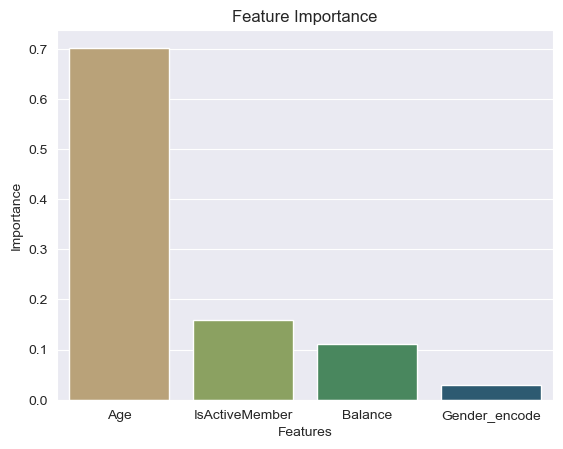

In [100]:
sns.barplot(x='Features', y='Importance', data = imp_rf_df, palette='gist_earth_r')
plt.title('Feature Importance')
plt.show()

#### Age has the highest weightwage when compared with other features followed by Activity of a member 

## STACKING

Stacking is one of the ensembling methods where we use baseline models(weak models) of heterogenous types to form one strong meta model,in this case I have taken Decision Tree Classifier,SVC,Gaussian Naive Bayes, RandomFOrest Classfier and the meta model as Logistic Regression

In [101]:
# get a stacking ensemble of models
def get_stacking():
# define the base models
    level0 = list()
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    level0.append(('RF',RandomForestClassifier()))
# define meta learner model
    level1 = LogisticRegression()
# define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model


In [102]:
# define the model
model = get_stacking()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, x, y, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('F1-Score: %.3f (%.3f)' % (st.mean(n_scores), st.stdev(n_scores)))

F1-Score: 0.799 (0.012)


## COMPARISION

### By Accuracy and F1-Score

In [103]:
import numpy as np

In [110]:
models1 = [('Logistic Regression', round(accuracy_score(y_test,y_predict_base_model)*100,1),f1_score(y_test,y_predict_base_model),0.735),
          ('Naive Bayes', round(accuracy_score(y_test,y_predict_naive_bayes_model)*100,1),f1_score(y_test,y_predict_naive_bayes_model),0.633),
          ('Decision Tree Classification', round(accuracy_score(y_test,y_predict_decision_tree_default)*100,1),f1_score(y_test,y_predict_decision_tree_default),0.550),
          ('Random Forest Classification', round(accuracy_score(y_test,y_predict_Random_forest_default)*100,1),f1_score(y_test,y_predict_Random_forest_default),0.628),
          ('Stacking',np.nan,round(0.800,3))]

In [111]:
predict_acc_f1=pd.DataFrame(data=models1,columns=['Model','Accuracy','F1-Score','ROC'])    #Converting the list to dataframe of values

In [106]:
predict_acc_f1['Accuracy']=predict_acc_f1['Accuracy'].astype(str) + '%'          #Adding the % symbol to Accuracy as unit

In [107]:
predict_acc_f1.sort_values('Accuracy',inplace=True,ascending=False)           #Sorting values by Accuracy from highest to lowest

In [108]:
predict_acc_f1

,Model,Accuracy,F1-Score,ROC
4,Stacking,nan%,0.800000,NaN
3,Random Forest Classification,83.9%,0.404439,0.628
2,Decision Tree Classification,83.3%,0.414035,0.550
0,Logistic Regression,80.8%,0.237781,0.735
1,Naive Bayes,80.6%,0.211096,0.633


By looking at the Dataframe of Models and their evaluators,Random Forest algorithim has the best accuracy

#### COMPARISION OF F1 AND ACCURACY BY VISUALS

Text(0.5, 1.0, 'Test Accuracy of Models')

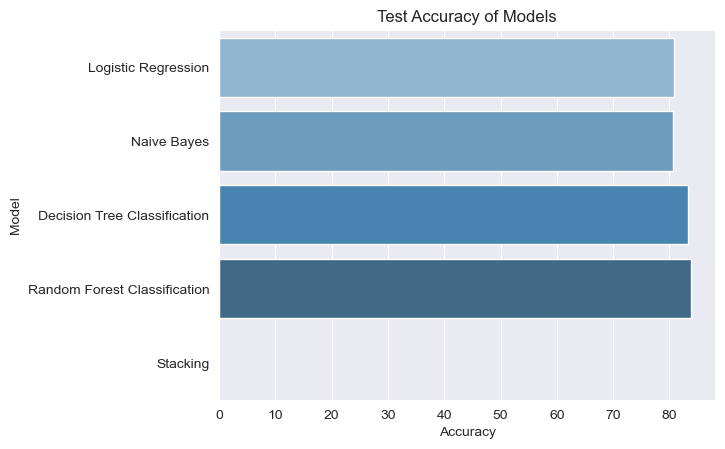

In [112]:
sns.barplot(x='Accuracy', y='Model', data = predict_acc_f1, palette='Blues_d')
plt.title('Test Accuracy of Models')

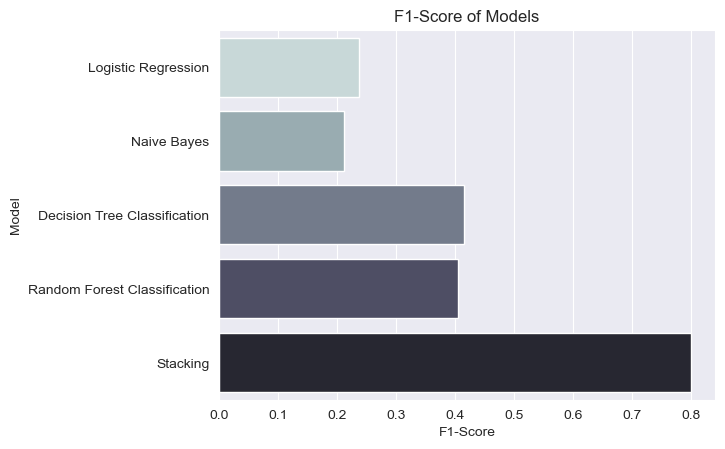

In [113]:
sns.barplot(x='F1-Score', y='Model', data = predict_acc_f1, palette='bone_r')
plt.title('F1-Score of Models')
plt.show()

Bar Plot visuals support numeric values of F1- Score and Accuracy

### By Confusion Matrix

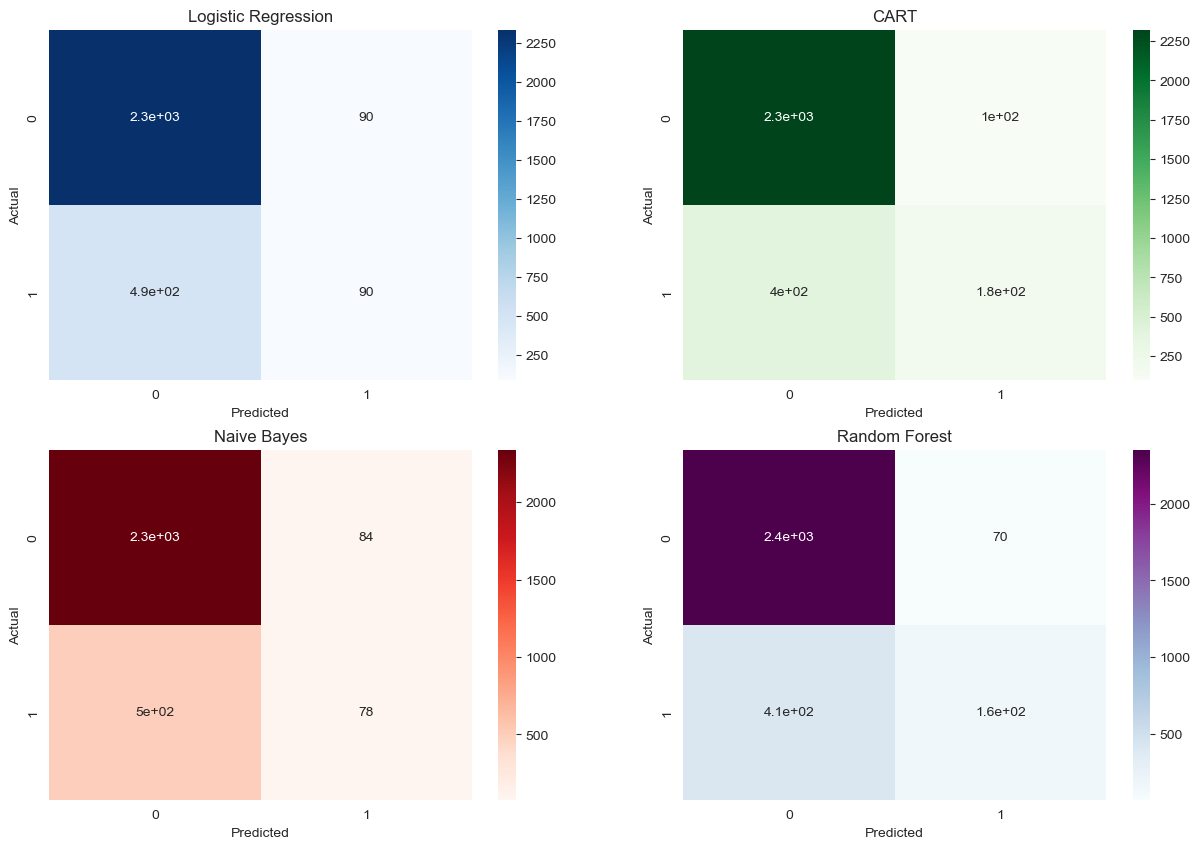

In [114]:
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.set_palette('Set1')

plt.subplot(221)
sns.heatmap(cm_base_model,cmap='Blues',annot=True)
plt.title('Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')


plt.subplot(222)
sns.heatmap(cm_cart,cmap='Greens',annot=True)
plt.title('CART')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(223)
sns.heatmap(cm_NB,cmap='Reds',annot=True)
plt.title('Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(224)
sns.heatmap(cm_rf,cmap='BuPu',annot=True)
plt.title('Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')


plt.show()

#### Random Forest has higher True Positive and True negative values, stating it classifies correctly for test data and a good model to work with

## By ROC 

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.735
No Skill: ROC AUC=0.500
CART: ROC AUC=0.745
No Skill: ROC AUC=0.500
NB: ROC AUC=0.742
No Skill: ROC AUC=0.500
RF: ROC AUC=0.776


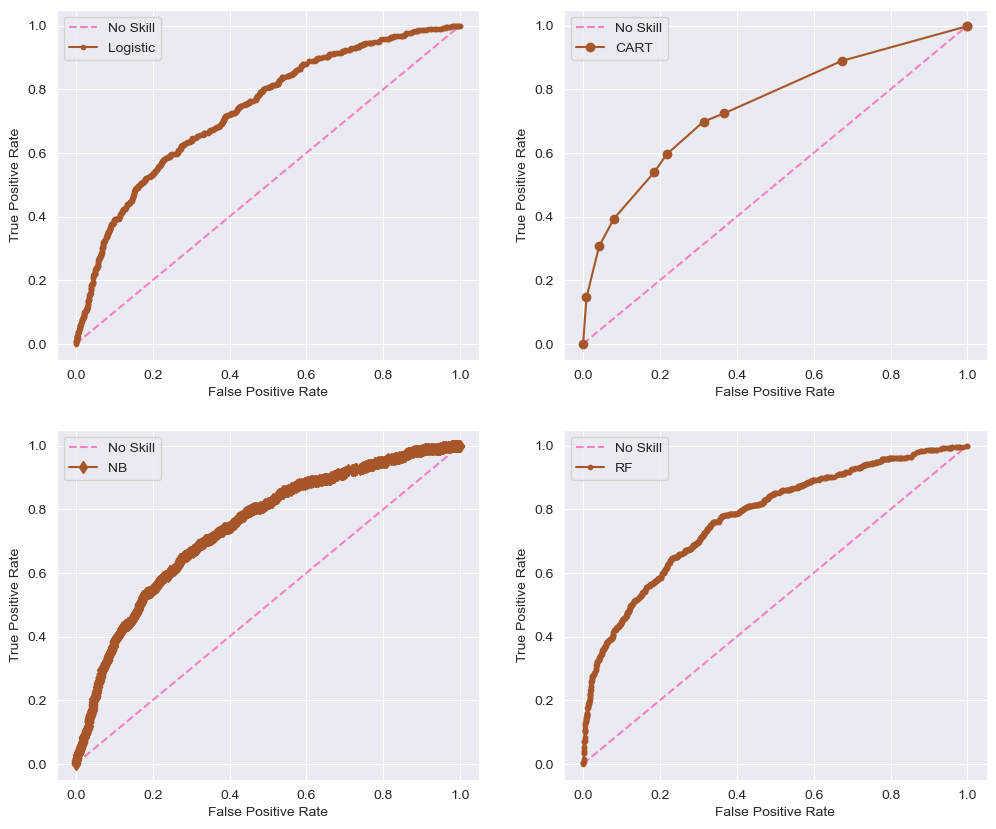

In [129]:
plt.figure(figsize=(12,10))
sns.set_style('darkgrid')
sns.set_palette('Set1_r')

plt.subplot(221)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = base_model.predict_proba(x_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


plt.subplot(222)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = decision_tree_default.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('CART: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='o', label='CART')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()




plt.subplot(223)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = naive_bayes_model.predict_proba(x_test)
lr_probs = lr_probs[:,1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('NB: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='d', label='NB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()



plt.subplot(224)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = random_forest_classifier.predict_proba(x_test)
lr_probs = lr_probs[:,1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('RF: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='RF')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


plt.show()

#### ROC for CART and Logistic Classification has the highest AUC which means that CART has the ability to predict models correctly

### By Classification Reports

In [116]:
print('Logistic Regression\n',classification_report(y_test,y_predict_base_model))
print('Decision Tree\n',classification_report(y_test,y_predict_decision_tree_default))
print('Naive Bayes\n',classification_report(y_test,y_predict_naive_bayes_model))
print('Random Forest\n',classification_report(y_test,y_predict_Random_forest_default))

Logistic Regression
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      2423
           1       0.50      0.16      0.24       577

    accuracy                           0.81      3000
   macro avg       0.66      0.56      0.56      3000
weighted avg       0.76      0.81      0.76      3000

Decision Tree
               precision    recall  f1-score   support

           0       0.85      0.96      0.90      2423
           1       0.64      0.31      0.41       577

    accuracy                           0.83      3000
   macro avg       0.74      0.63      0.66      3000
weighted avg       0.81      0.83      0.81      3000

Naive Bayes
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      2423
           1       0.48      0.14      0.21       577

    accuracy                           0.81      3000
   macro avg       0.65      0.55      0.55      3000
weighted avg       0.76  

#### In the above Classification Reports which contains most of the model Evaluators of each model,

* We can observe Precision which defines the ability of the model for identifying negatives (0) and positives(1)

* There is Test accuracy along with weighted and unweighted accuracy 

* F1- Score is an error metric which considers both recall and harmonic mean of precision


## CONCLUSION

Accuracy alone cannot be the deciding factor for a good model, as accuracy doesn't classify well when multi classes are present.So we can look for values such as F1-score which is an error metric considering recall and harmonic mean of precision and then there is Confusion Matrix, which gives accurate results of how many values are being predicted correctly and incorrectly both by machine and actual values

In [ ]:
predict_acc_f1

Hence, by considering the major classifiaction evaluators alltogether put into a single Dataframe, the company(bank) can identify the churness of a Customer by modelling with the highest Accuracy model, **Random Forest Classification Algorithim**

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.735
No Skill: ROC AUC=0.500
CART: ROC AUC=0.745
No Skill: ROC AUC=0.500
NB: ROC AUC=0.742
No Skill: ROC AUC=0.500
RF: ROC AUC=0.776


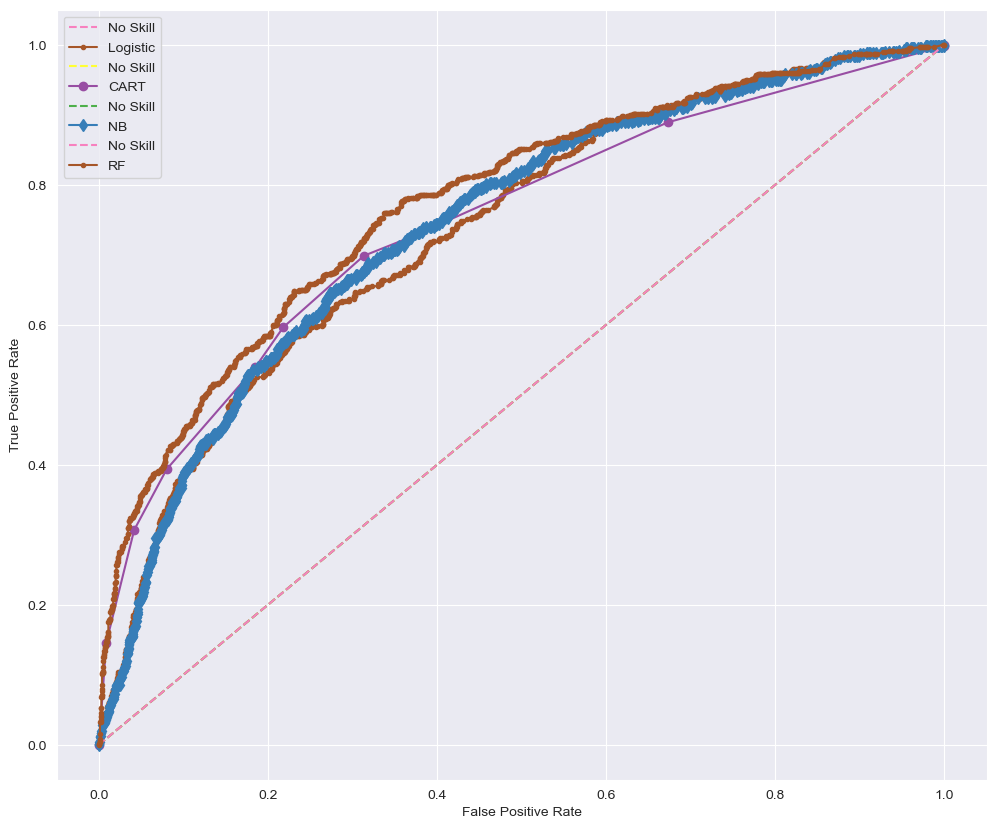

In [131]:
plt.figure(figsize=(12,10))
sns.set_style('darkgrid')
sns.set_palette('Set1_r')

ns_probs = [0 for _ in range(len(y_test))]
lr_probs = base_model.predict_proba(x_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = decision_tree_default.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('CART: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='o', label='CART')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()




ns_probs = [0 for _ in range(len(y_test))]
lr_probs = naive_bayes_model.predict_proba(x_test)
lr_probs = lr_probs[:,1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('NB: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='d', label='NB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()



ns_probs = [0 for _ in range(len(y_test))]
lr_probs = random_forest_classifier.predict_proba(x_test)
lr_probs = lr_probs[:,1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('RF: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='RF')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()


plt.show()